In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import utils
from keras.utils import np_utils
import keras
from keras.datasets import mnist

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
y_train[0]

5

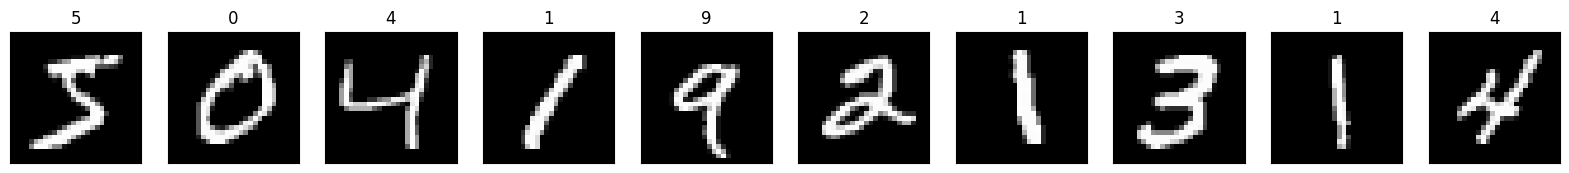

In [4]:
fig, axes = plt.subplots(ncols=10, sharex=False,
                         sharey=True, figsize=(20,4))
for i in range(10):
  axes[i].set_title(y_train[i])
  axes[i].imshow(X_train[i], cmap='gray')
  axes[i].get_xaxis().set_visible(False)
  axes[i].get_yaxis().set_visible(False)
plt.show()

In [5]:
X_test=X_test.reshape(X_test.shape[0],28,28,1)
X_train=X_train.reshape(X_train.shape[0],28,28,1)

In [6]:
X_train.shape

(60000, 28, 28, 1)

In [7]:
X_test=X_test.astype('float32')
X_train=X_train.astype('float32')
X_train /=255
X_test  /=255
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)


In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [9]:
model= Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

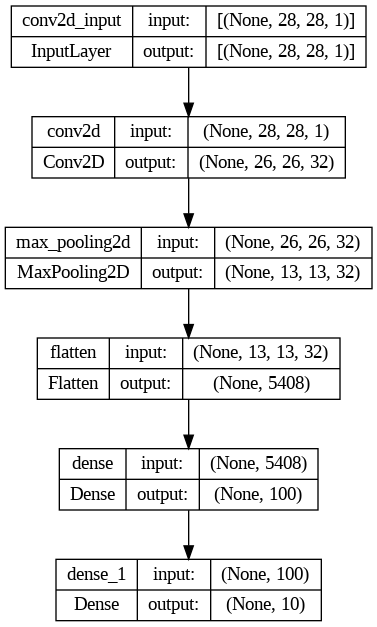

In [ ]:
utils.plot_model(model, show_shapes=True)

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=32,epochs=2,verbose=1,validation_data=(X_test,y_test))

Epoch 1/2
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1334 - accuracy: 0.9596 - val_loss: 0.0556 - val_accuracy: 0.9816
Epoch 2/2
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0451 - accuracy: 0.9861 - val_loss: 0.0571 - val_accuracy: 0.9801


In [11]:
model.save('mnist_cnn_model.h5')

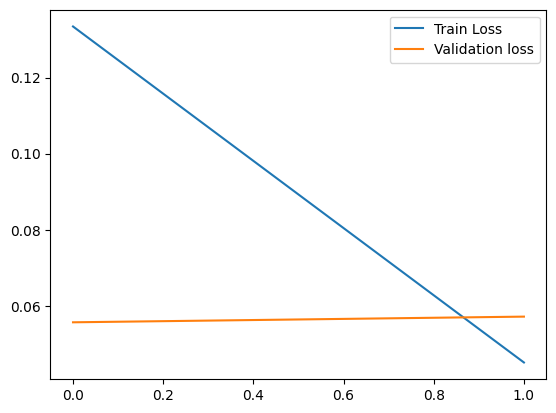

In [12]:
plt.plot(model.history.history['loss'],label='Train Loss')
plt.plot(model.history.history['val_loss'],label='Validation loss')
plt.legend()